## Phase 1 [Data cleaning phase]:


1. Import required libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2. Read the csv file


In [ ]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

3. Show first five results


In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


4. Show if columns have any NaN,N/A or null values in boolean form


In [3]:
df.isnull().values.any()

True

5. Check how many null,empty,N/A values are there in each column


In [4]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
len(df)

16719

6. Show null values of each column with the help of Heatmap


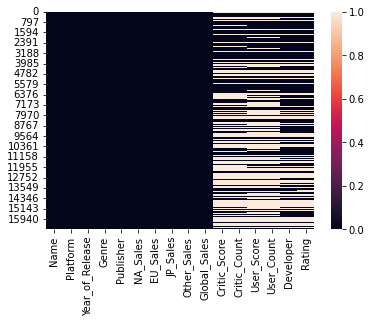

In [7]:
sns.heatmap(data=pd.isnull(df))
plt.show()

7. Drop outliers (columns which are not useful according to you)


*I decided to drop the critic count and user count since they have a large number of na'sand they don't seem super useful*

In [9]:
df = df.drop(['Critic_Count','User_Count'],axis=1)

8. Drop the null values containing rows from the object which you created in point 7


*instead of dropping all the rows with na's I set all the na's for scores to 0 which will lower the average score but thats ok I tried to reduce the number of rows that were getting dropped*

In [10]:
df['User_Score'] = df['User_Score'].fillna(0)
df['Critic_Score'] = df['Critic_Score'].fillna(0)
df['Rating'] = df['Rating'].fillna('NR')
df['Developer'] = df['Developer'].fillna('Unknown')
df['Publisher'] = df['Publisher'].fillna('Unknown')

In [14]:
df = df.dropna()

9. Check the dataframe again if there is anything which you want to remove more.


In [15]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
User_Score         0
Developer          0
Rating             0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16448 non-null  object 
 1   Platform         16448 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16448 non-null  object 
 4   Publisher        16448 non-null  object 
 5   NA_Sales         16448 non-null  float64
 6   EU_Sales         16448 non-null  float64
 7   JP_Sales         16448 non-null  float64
 8   Other_Sales      16448 non-null  float64
 9   Global_Sales     16448 non-null  float64
 10  Critic_Score     16448 non-null  float64
 11  User_Score       16448 non-null  float64
 12  Developer        16448 non-null  object 
 13  Rating           16448 non-null  object 
dtypes: float64(8), object(6)
memory usage: 1.9+ MB


In [20]:
df['Year_of_Release'] = df['Year_of_Release'].astype('int16')

10. Export dataframe to your desired location with no index column

In [21]:
df.to_csv('Video_Game_Sales_Cleaned.csv',index=False)